<a href="https://colab.research.google.com/github/keerthireddy-28/STML_2025/blob/main/Keerthi_2303A52263_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STML PROJECT**

# **Empirical Mode Decomposition (EMD) Implementation and Visualization**

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.4 MB/s eta 0:00:00
IMFs saved to /content/drive/MyDrive/datasets/imfs_outputs.xlsx


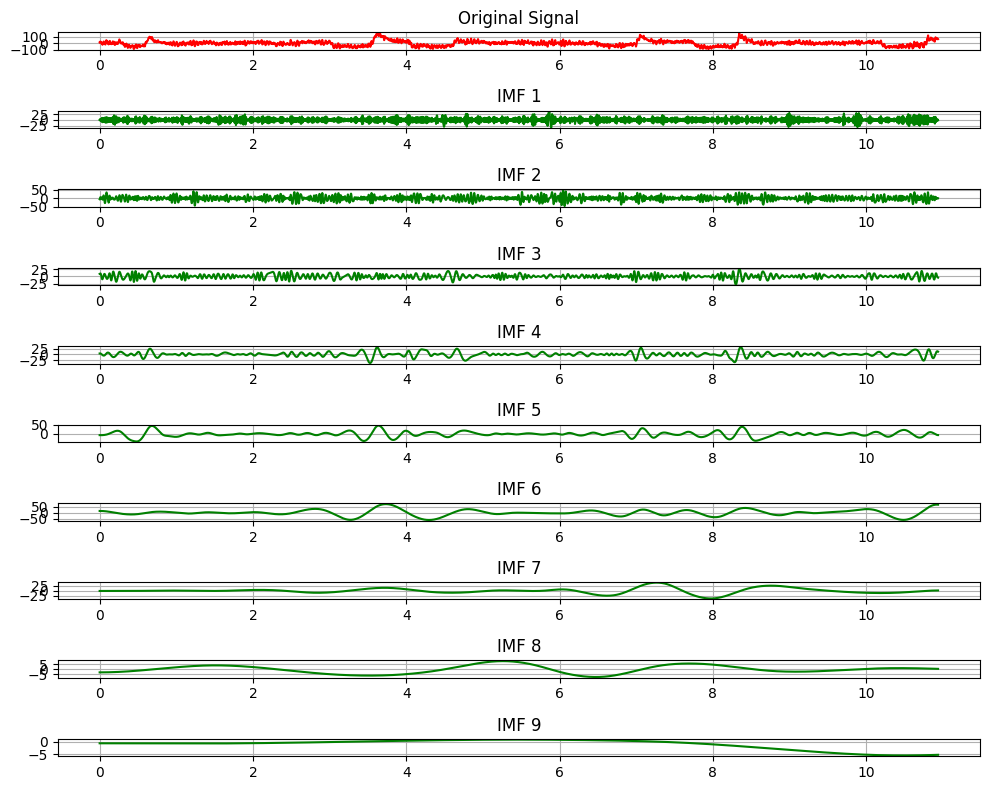

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Install the PyEMD package if you haven't already
!pip install EMD-signal
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import EMD
import pandas as pd

# Step 1: Load the signal from the Excel file
signal_df = pd.read_excel('/content/drive/MyDrive/datasets/syntheticforEWT.xlsx')  # Adjust file path accordingly
signal = signal_df.iloc[:, 0].values  # Assuming the signal is in the first column

# Step 2: Generate the corresponding time vector
t = np.linspace(0, len(signal) / 512, len(signal))  # Assuming a sampling frequency of 1000 Hz (adjust if necessary)

# Step 3: Perform Empirical Mode Decomposition (EMD)
emd = EMD()
IMFs = emd.emd(signal)

# Step 4: Plot the original signal and the IMFs
num_IMFs = IMFs.shape[0]  # Number of IMFs
imfs_df = pd.DataFrame(IMFs.T, columns=[f'IMF_{i+1}' for i in range(IMFs.shape[0])])
# Write the IMFs to an Excel file
output_path = '/content/drive/MyDrive/datasets/imfs_outputs.xlsx'
imfs_df.to_excel(output_path, index=False)

print(f'IMFs saved to {output_path}')


plt.figure(figsize=(10, 8))

# Plot original signal
plt.subplot(num_IMFs + 1, 1, 1)
plt.plot(t, signal, 'r')
plt.title('Original Signal')
plt.grid()

# Plot IMFs
for i in range(num_IMFs):
    plt.subplot(num_IMFs + 1, 1, i + 2)
    plt.plot(t, IMFs[i], 'g')
    plt.title(f'IMF {i + 1}')
    plt.grid()

plt.tight_layout()
plt.show()

# **Kurtosis Calculation for Intrinsic Mode Functions (IMFs)**

In [ ]:
from scipy.stats import kurtosis
# Step 4: Calculate kurtosis for each IMF
kurtosis_values = [kurtosis(IMF, fisher=True) for IMF in IMFs]

# Print kurtosis values for each IMF
for i, k in enumerate(kurtosis_values):
    print(f'Kurtosis of IMF {i + 1}: {k:.4f}')

Kurtosis of IMF 1: 0.6808
Kurtosis of IMF 2: 0.2977
Kurtosis of IMF 3: 0.5193
Kurtosis of IMF 4: 2.4556
Kurtosis of IMF 5: 1.7346
Kurtosis of IMF 6: 0.9084
Kurtosis of IMF 7: 1.6979
Kurtosis of IMF 8: -0.7360
Kurtosis of IMF 9: 0.1357


# **Filtering and Saving Intrinsic Mode Functions (IMFs) Based on Kurtosis Threshold**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

# Load EOG signal data
eog_signal = pd.read_excel('/content/drive/MyDrive/datasets/imfs_outputs.xlsx')  # Adjust file path
print("Data Loaded Successfully:", eog_signal.shape)

# Calculate kurtosis for each IMF and store high-kurtosis IMFs
thresholds = []
imfs_to_save = {}
remaining_imfs = {}

# Calculate kurtosis for each IMF (assuming each IMF is in a separate column)
for column in eog_signal.columns:
    imf_data = eog_signal[column].dropna().values  # Ensure no NaNs in the data
    imf_kurtosis = kurtosis(imf_data, fisher=True)
    thresholds.append(imf_kurtosis)

    print(f"IMF '{column}' Kurtosis: {imf_kurtosis:.4f}")

# Calculate threshold with a reduced multiplier
mean_kurtosis = np.mean(thresholds)
std_kurtosis = np.std(thresholds)
threshold = mean_kurtosis + 1.5 * std_kurtosis  # Reduced multiplier for threshold
print(f"Kurtosis Threshold (Reduced): {threshold:.2f}")

# Separate IMFs based on the reduced threshold
for column, kurt in zip(eog_signal.columns, thresholds):
    if kurt > threshold:
        imfs_to_save[column] = eog_signal[column]
    else:
        remaining_imfs[column] = eog_signal[column]

# Save high-kurtosis IMFs to a file
if imfs_to_save:
    filtered_imfs_df = pd.DataFrame(imfs_to_save)
    filtered_imfs_df.to_excel('/content/drive/MyDrive/datasets/imfs_high_kurtosis.xlsx', index=False)
    print("High-kurtosis IMFs saved successfully.")
else:
    print("No IMFs exceeded the reduced kurtosis threshold.")

# Save remaining IMFs to another file
if remaining_imfs:
    remaining_imfs_df = pd.DataFrame(remaining_imfs)
    remaining_imfs_df.to_excel('/content/drive/MyDrive/datasets/imfs_below_threshold.xlsx', index=False)
    print("Remaining IMFs saved successfully.")
else:
    print("All IMFs exceeded the reduced kurtosis threshold.")


Data Loaded Successfully: (5601, 9)
IMF 'IMF_1' Kurtosis: 0.6808
IMF 'IMF_2' Kurtosis: 0.2977
IMF 'IMF_3' Kurtosis: 0.5193
IMF 'IMF_4' Kurtosis: 2.4556
IMF 'IMF_5' Kurtosis: 1.7346
IMF 'IMF_6' Kurtosis: 0.9084
IMF 'IMF_7' Kurtosis: 1.6979
IMF 'IMF_8' Kurtosis: -0.7360
IMF 'IMF_9' Kurtosis: 0.1357
Kurtosis Threshold (Reduced): 2.23
High-kurtosis IMFs saved successfully.
Remaining IMFs saved successfully.


# **Merging IMFs into a Unified Column for Simplified Analysis**

In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/drive/MyDrive/datasets/imfs_below_threshold.xlsx'  # Replace with your actual file path
imfs_below_threshold = pd.read_excel(file_path)
print("Data Loaded Successfully:", imfs_below_threshold.shape)

# Combine all columns into a single column
combined_column = pd.concat([imfs_below_threshold[col] for col in imfs_below_threshold.columns], axis=0).reset_index(drop=True)

# Convert the combined data into a DataFrame
combined_df = pd.DataFrame(combined_column, columns=['Combined_IMFs'])

# Save the combined column to a new Excel file without indexing
output_file = '/content/drive/MyDrive/datasets/imfs_belowthreshold_single_column.xlsx'  # Replace with your desired output file path
combined_df.to_excel(output_file, index=False)

print(f"Combined IMFs saved successfully to {output_file}.")


Data Loaded Successfully: (5601, 8)
Combined IMFs saved successfully to /content/drive/MyDrive/datasets/imfs_belowthreshold_single_column.xlsx.


# **Assigning Labels to High-Kurtosis IMFs for Classification Tasks**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/datasets/imfs_high_kurtosis.xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(file_path)

# Add a new column 'Label' with a constant value of 1
data['Label'] = 1

# Save the modified dataset to a new file
modified_file_path = '/content/drive/MyDrive/datasets/imfs_high_kurtosis_label.xlsx'  # Replace with the desired save path
data.to_excel(modified_file_path, index=False)

print("File updated and saved successfully!")


File updated and saved successfully!


# **Assigning Labels to Low-Kurtosis IMFs for Classification Tasks**

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/datasets/imfs_belowthreshold_single_column.xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(file_path)

# Add a new column 'Label' with a constant value of 0
data['Label'] = 0

# Save the modified dataset to a new file
modified_file_path = '/content/drive/MyDrive/datasets/imfs_below_threshold_label.xlsx'  # Replace with the desired save path
data.to_excel(modified_file_path, index=False)

print("File updated and saved successfully!")


File updated and saved successfully!


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/datasets/imfs_belowthreshold_single_column.xlsx'  # Replace with the path to your Excel file
data = pd.read_excel(file_path)

# Add a new column 'Label' with a constant value of 0
data['Label'] = 0

# Save the modified dataset to a new file
modified_file_path = '/content/drive/MyDrive/datasets/imfs_below_threshold_label.xlsx'  # Replace with the desired save path
data.to_excel(modified_file_path, index=False)

print("File updated and saved successfully!")


Merged data saved to /content/drive/MyDrive/datasets/merged_imf_label.xlsx


# **Training and Evaluating a KNN Classifier on IMF Dataset for Label Prediction**








# Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset

In [ ]:
file_path = '/content/drive/MyDrive/datasets/merged_imf_label.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Defining Features and Target Variables for Model Training

In [ ]:
X = data[['imf']]
y = data['label']

# Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and Training the KNN Classifier for Prediction

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluating the KNN Model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 87.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8964
           1       0.12      0.02      0.03      1118

    accuracy                           0.88     10082
   macro avg       0.51      0.50      0.48     10082
weighted avg       0.80      0.88      0.83     10082


Confusion Matrix:
[[8844  120]
 [1101   17]]
